In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data  # TODO: function
path_to_train_data = "../data/train_file.xlsx"
df = pd.read_excel(path_to_train_data)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


### Dataset overview and descriptive statistic
_Please check [Readme.md](..%2FREADME.md) for variable description_

In [3]:
df_shape = df.shape
print(f"Dataset has {df_shape[0]} observations with {df_shape[1]} features:\n{', '.join(df.columns)}.")

Dataset has 32910 observations with 15 features:
age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, previous, poutcome, y.


In [4]:
df.info() # concise summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32910 non-null  int64 
 1   job          32910 non-null  object
 2   marital      32910 non-null  object
 3   education    32910 non-null  object
 4   default      32910 non-null  object
 5   housing      32910 non-null  object
 6   loan         32910 non-null  object
 7   contact      32910 non-null  object
 8   month        32910 non-null  object
 9   day_of_week  32910 non-null  object
 10  duration     32910 non-null  int64 
 11  campaign     32910 non-null  int64 
 12  previous     32910 non-null  int64 
 13  poutcome     32910 non-null  object
 14  y            32910 non-null  object
dtypes: int64(4), object(11)
memory usage: 3.8+ MB


In [5]:
print(f"Number of unique values:\n{df.nunique(axis=0)}")

Number of unique values:
age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
previous          8
poutcome          3
y                 2
dtype: int64


In [6]:
# check duplicated rows and remove duplicates
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
1577,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,0,nonexistent,no
1923,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,0,nonexistent,no
5861,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,0,nonexistent,no
6257,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,0,nonexistent,no
6306,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,0,nonexistent,no
6807,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,0,nonexistent,no
12252,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,0,nonexistent,no
18172,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,0,nonexistent,no
20067,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,0,nonexistent,no
20839,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,0,nonexistent,no


In [7]:
df.drop_duplicates(keep="last", inplace=True), df.shape

(None, (32902, 15))

In [8]:
# numeric values description
df.describe()

,age,duration,campaign,previous
count,32902.000000,32902.000000,32902.000000,32902.000000
mean,40.012796,258.196523,2.560817,0.174853
std,10.402346,259.089636,2.753590,0.499265
min,17.000000,0.000000,1.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,7.000000


Observations:
* The mean value differs from the median value (50% or 50th percentile), what indicates the data are skewed or not normal distributed.
* There is a large difference between 75% and max value, especially in "duration".
* These observations might be a sign that there are outliers in the dataset. 

### Univariate analysis

In [9]:
numeric_features = df.select_dtypes(include=['int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

#### ...of numeric features

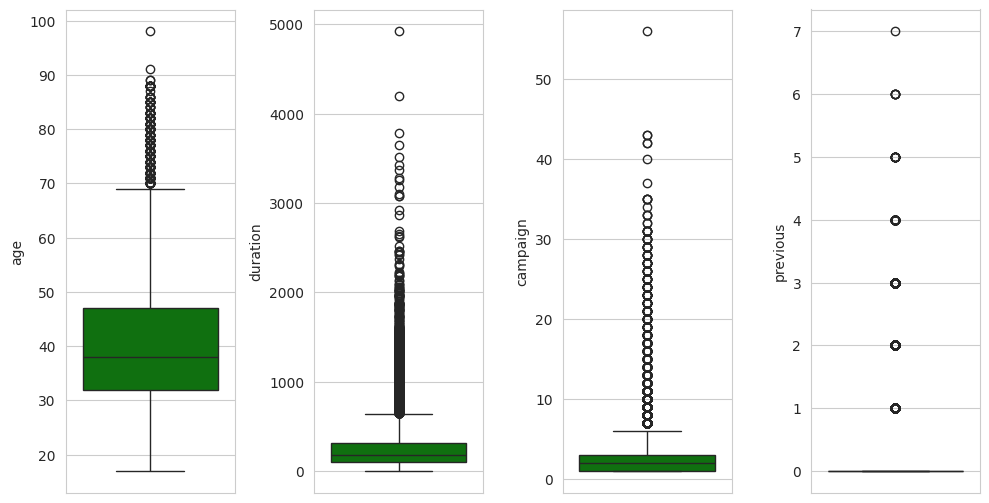

In [10]:
number_of_columns=len(numeric_features)
number_of_rows = 10
plt.figure(figsize=(10, 50))
sns.set_style('whitegrid')
for i in range(0, number_of_columns):
    plt.subplot(10, number_of_columns, i+1)
    sns.boxplot(df[numeric_features[i]], color='green', orient='v')
plt.tight_layout()

Observations:
* The box plots confirm our previous observation that the data for these features are heavily skewed. We see a predominance of low values and occasional high-value outliers.
* The features 'duration' and 'campaign' show a  significant number of high value outliers, indicating that while most of the observations are low, there are some significant exceptions.
* The feature 'previous' has a very narrow IQR and many zero values.
* **age**:
    * The median age is 38 (we know it exactly from the numeric values description table)
    * The interquartile range (IQR) is between 32 and 47 years, the middle value (50% or median) lies in this range and corresponds to 38 years.
    * The distribution has a few outliers above 70 years.
    * The lower whisker extends to around 20 years, indicating the minimum age in the dataset (17 years).
* **duration**:
    * The median duration is relatively low compared to the maximum values.
    * The IQR is very narrow. This indicates that most of the data points are concentrated in a small range at the lower end of the duration scale.
    * There are numerous outliers, with some durations exceeding 4000 seconds. That means our data have right-skewed distribution.
    * The lower whisker (or the 1st Quartile) is near 0, indicating the minimum duration is close to 0 or 1.
* **campaign**:
    * The median value for the number of campaigns is very low.
    * The IQR is narrow, showing that most values are very small.
    * There are many outliers with campaign values up to 50. This also indicates a right-skewed distribution.
    * The lower whisker is at or near 0, suggesting that the minimum number of campaigns (contacts performed during this campaign) is very low.
* **previous**:
    * The median number of previous contacts is 0, indicating that many customers have not been contacted before this campaign.
    * The IQR is extremely narrow, showing that most data points are 0 or very close to it.
    * There are a few outliers, with values up to 7, indicating some customers have been contacted multiple times.
    * The lower whisker is at 0, confirming the minimum number of previous contacts is 0.
  
We will see these skewed patterns again when we visualize the data distribution for each of the numerical features. 

In [11]:
# df['age'].value_counts()

In [12]:
# df['duration'].value_counts()

In [13]:
# df['campaign'].value_counts()  #  number of contacts performed during this campaign and for this client

In [14]:
# df['previous'].value_counts()

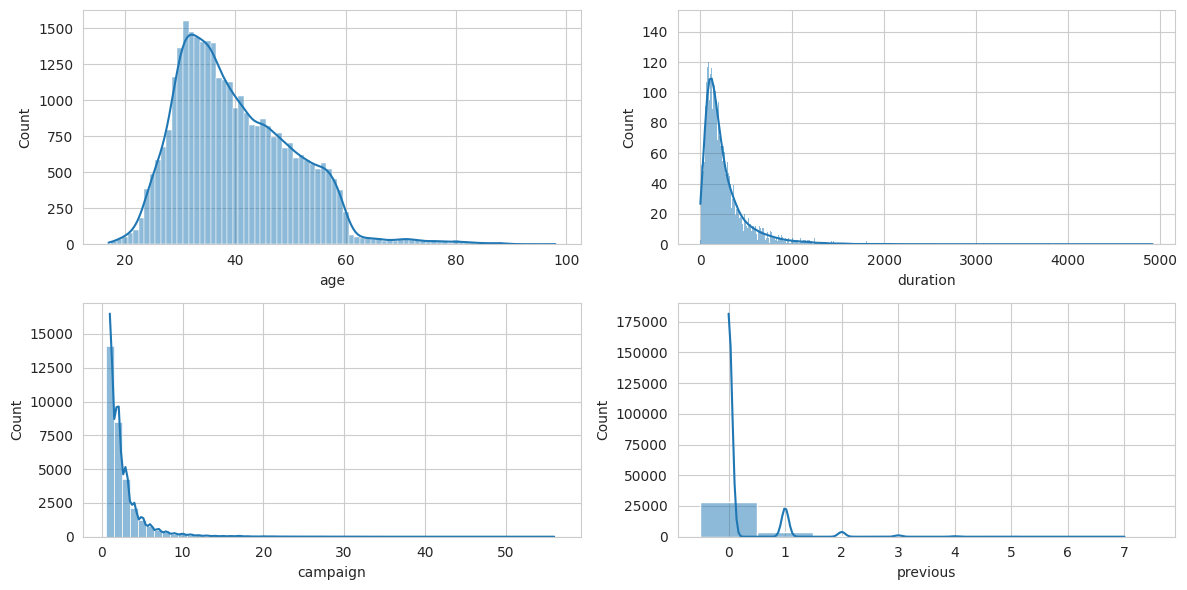

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.flatten()
for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, discrete=True, ax=axs[i], kde=True)
    axs[i].grid(True)

# to prevent overlap
plt.tight_layout()

0          (47.0, 98.0]
1          (32.0, 38.0]
2          (47.0, 98.0]
3          (32.0, 38.0]
4          (47.0, 98.0]
              ...      
32905    (16.999, 32.0]
32906      (32.0, 38.0]
32907      (32.0, 38.0]
32908      (47.0, 98.0]
32909      (38.0, 47.0]
Name: age, Length: 32902, dtype: category
Categories (4, interval[float64, right]): [(16.999, 32.0] < (32.0, 38.0] < (38.0, 47.0] < (47.0, 98.0]]

In [18]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y,bins
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no,"(47.0, 98.0]"
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no,"(32.0, 38.0]"
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes,"(47.0, 98.0]"
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no,"(32.0, 38.0]"
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no,"(47.0, 98.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32905,30,management,single,university.degree,no,no,no,cellular,nov,thu,197,5,1,failure,no,"(16.999, 32.0]"
32906,34,blue-collar,married,high.school,no,yes,no,telephone,jun,mon,562,3,0,nonexistent,no,"(32.0, 38.0]"
32907,33,technician,married,professional.course,no,yes,yes,cellular,aug,mon,61,1,0,nonexistent,no,"(32.0, 38.0]"
32908,58,unemployed,married,basic.9y,no,no,no,telephone,jun,mon,266,2,0,nonexistent,no,"(47.0, 98.0]"


In [19]:
df["bins"].value_counts()

bins
(16.999, 32.0]    8950
(38.0, 47.0]      8104
(32.0, 38.0]      7957
(47.0, 98.0]      7891
Name: count, dtype: int64

In [20]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

#### ...of categorical features

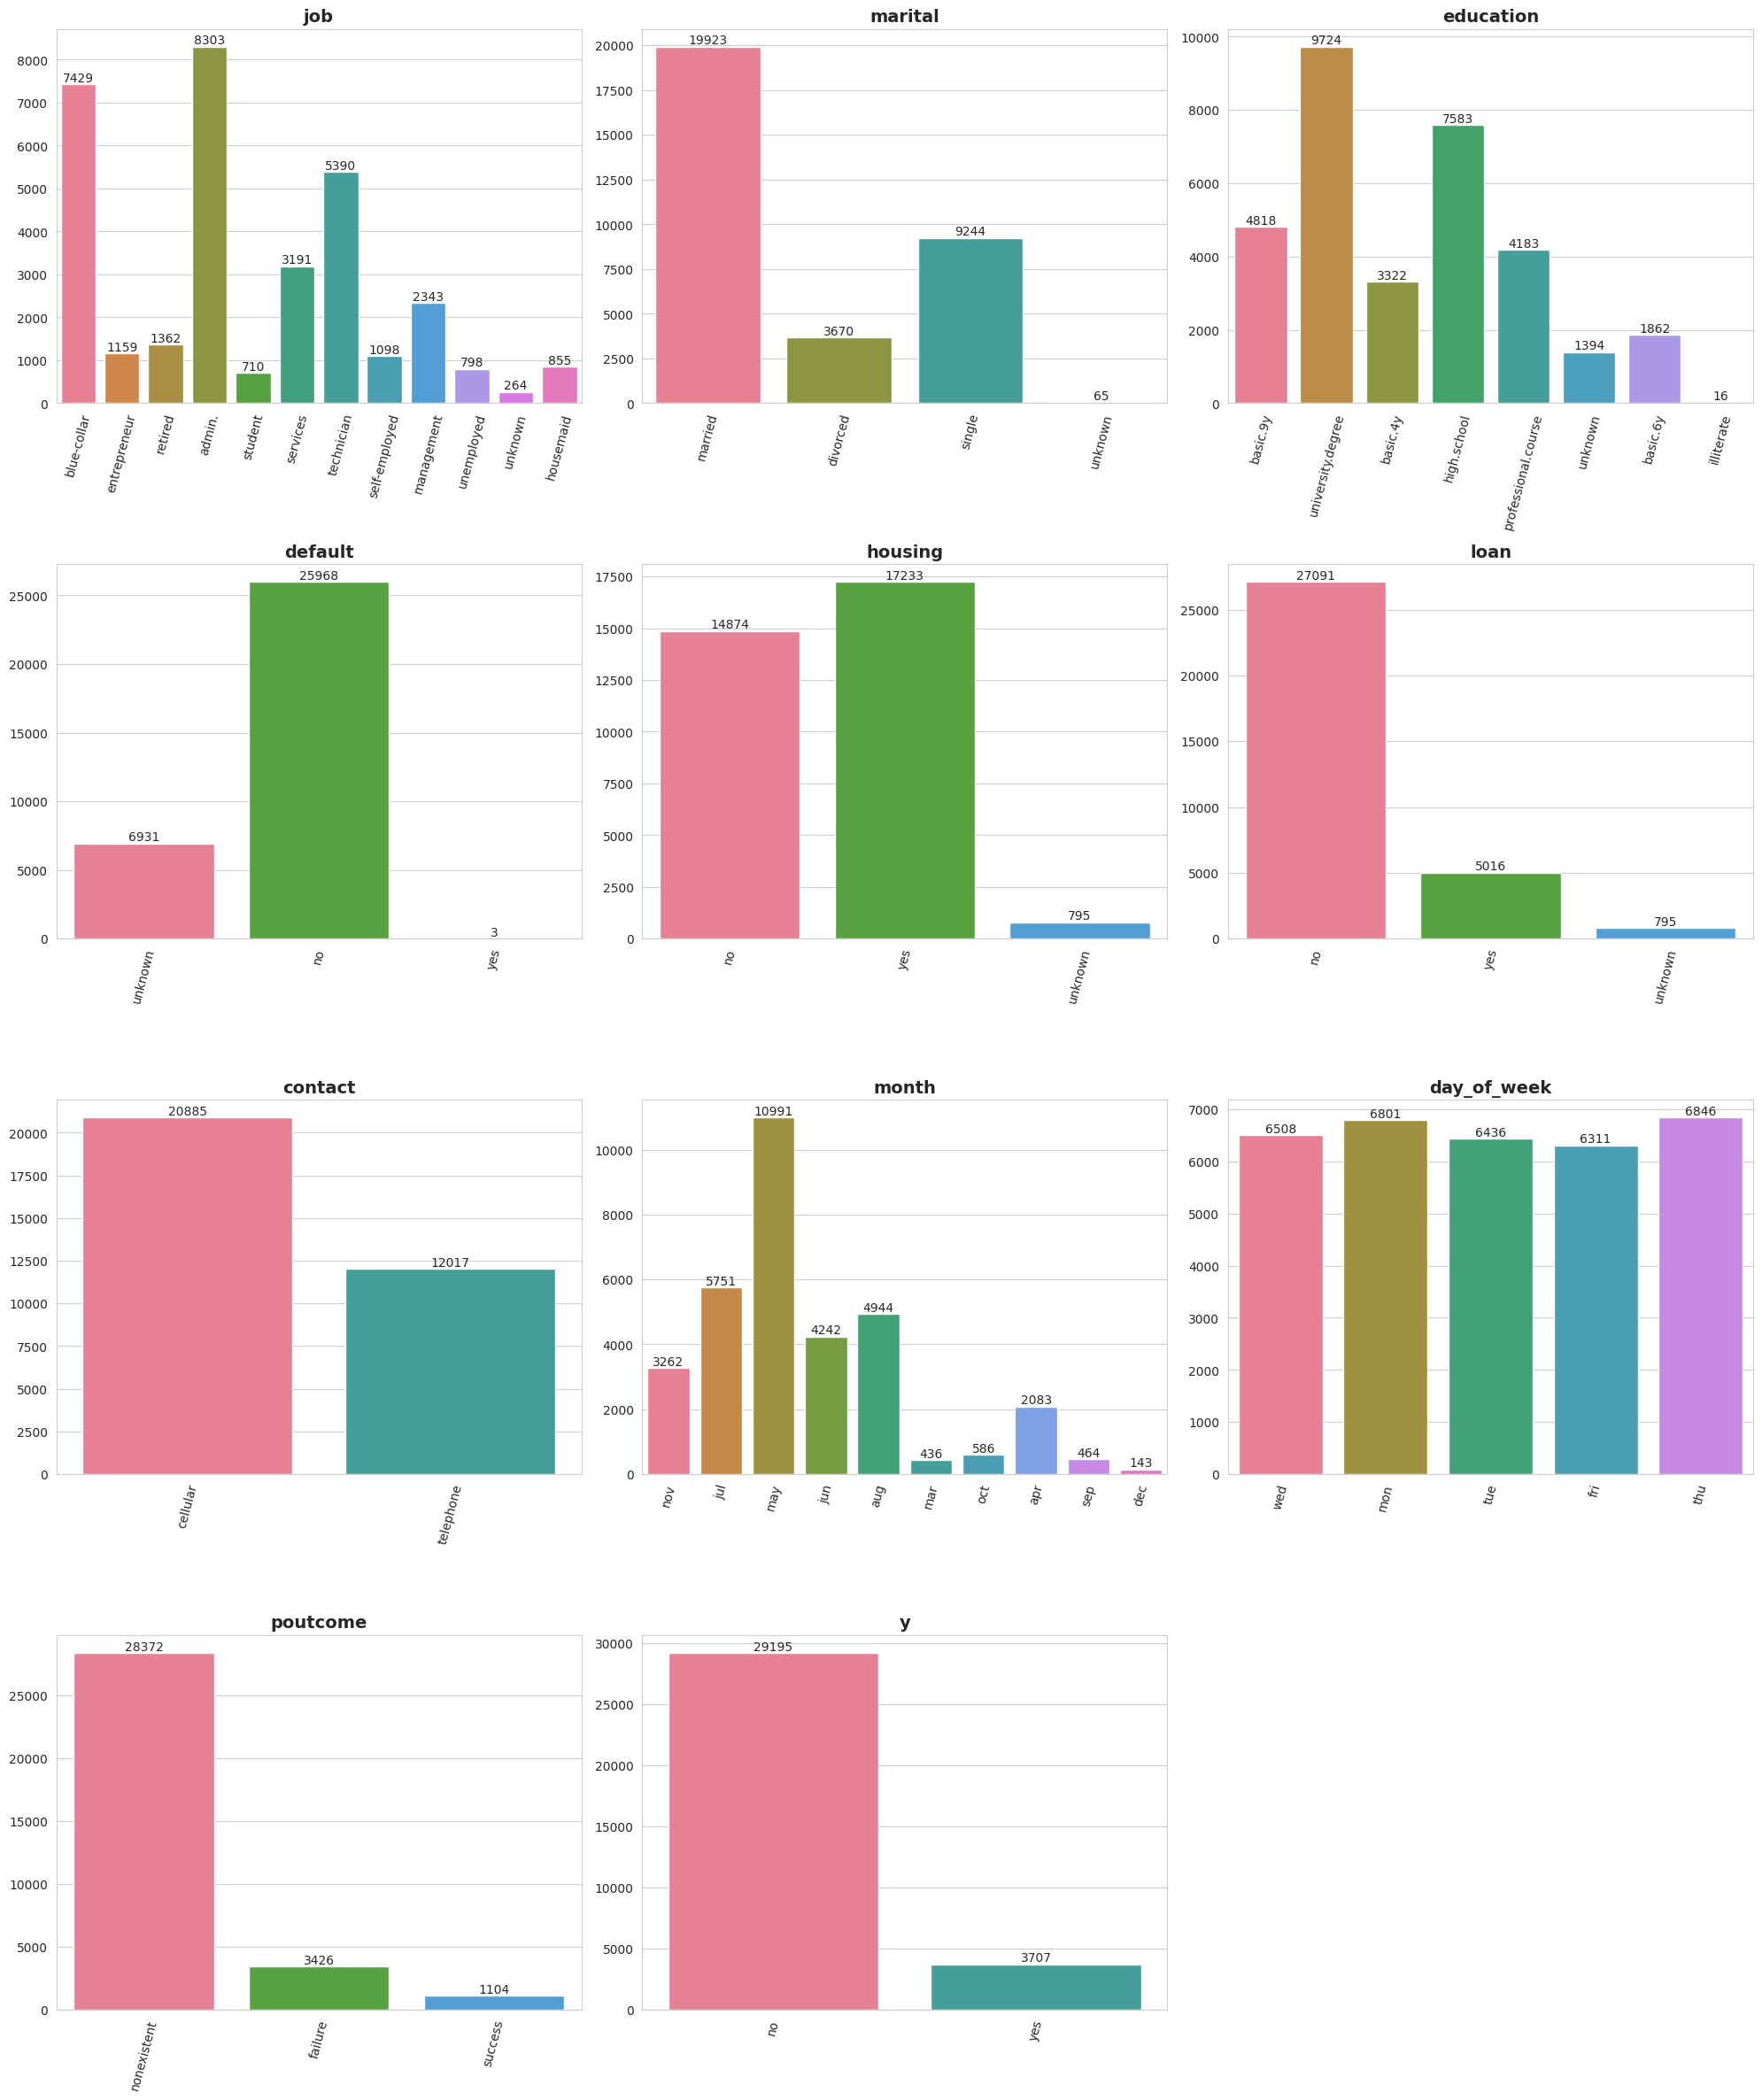

In [21]:
plt.figure(figsize=(20, 35))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    ax = sns.countplot(data=df, x=feature, palette='husl', hue=feature)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(feature, fontsize=14, fontweight='bold') 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=75)  

plt.tight_layout()

Observations:

* There is a significant class imbalance in the target variable "y". This could affect model performance and may require techniques such as resampling or the use of appropriate metrics to deal with it.
* The same applies to other categories such as "marital", "education", "loan", and "poutcome".
* The distribution within categories like "job" and "education" shows clear dominance of certain classes, which may need to be taken into account in analysis and model training.

### Bivariate analysis

#### Correlation matrix

Text(0.5, 1.0, 'Correlation matrix of numerical features')

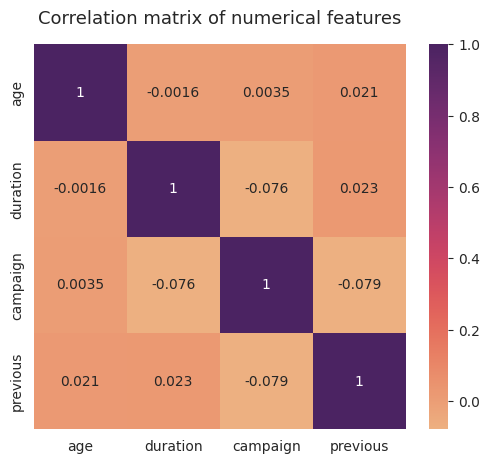

In [22]:
corr_mtx = df[numeric_features].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_mtx, cmap="flare", annot=True)
plt.title("Correlation matrix of numerical features", fontsize=13, pad=15)

Observations:

* The correlation values are all very close to zero, which indicates that there are no strong linear relationships between any of the pairs of features in this dataset.
* The weak correlations suggest that each feature is largely independent of the others in terms of linear relationships.

#### Correlation matrix with target value

In [23]:
# turn target value "y" to numeric one
df["y"] = np.where(df["y"] == "yes", 1, 0)
df_numeric_with_target = df[numeric_features].join(df["y"])

Text(0.5, 1.0, 'Correlation matrix of numerical features')

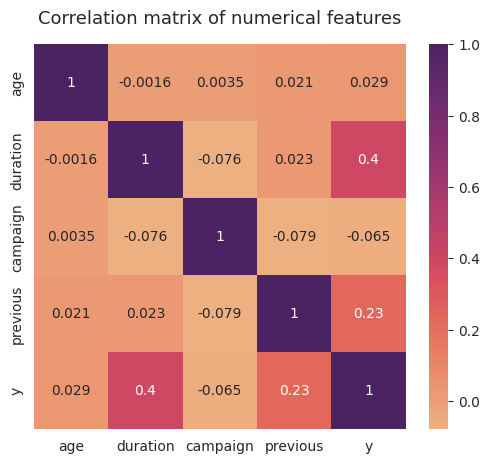

In [24]:
corr_mtx = df_numeric_with_target.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_mtx, cmap="flare", annot=True)
plt.title("Correlation matrix of numerical features", fontsize=13, pad=15)

Observations:

* With the addition of the target variable "y" to the correlation matrix, we can now observe how each numeric feature correlates with the outcome of whether a client subscribed to a term deposit or not.
* The correlations among the numeric features themselves remain very low, indicating that they are largely independent of one another.
* Other features (age, campaign, previous) have weak correlations with the target variable, implying that these features do not strongly influence the outcome on their own.
* **age** (0.029): There is a very weak positive correlation between age and the target variable. This suggests that age has a very small impact on the likelihood of a customer subscribing to a term deposit.
* **duration** (0.4): There is a positive correlation between duration and the target variable. This indicates that longer durations of interactions are associated with a higher likelihood of the client subscribing to a term deposit. This is the most significant correlation observed in the matrix. BUT! TODO
* **campaign** (-0.065): There is a very weak negative correlation between the number of campaigns and the target variable. This suggests that clients who have been contacted more frequently are slightly less likely to subscribe to a term deposit, but the relationship is weak.
* **previous** (0.23): There is a weak positive correlation between the number of previous contacts and the target variable. This indicates that clients who have been contacted previously are somewhat more likely to subscribe to a term deposit.

#### The positive correlation of duration with target value can be observed on the scatter plots...

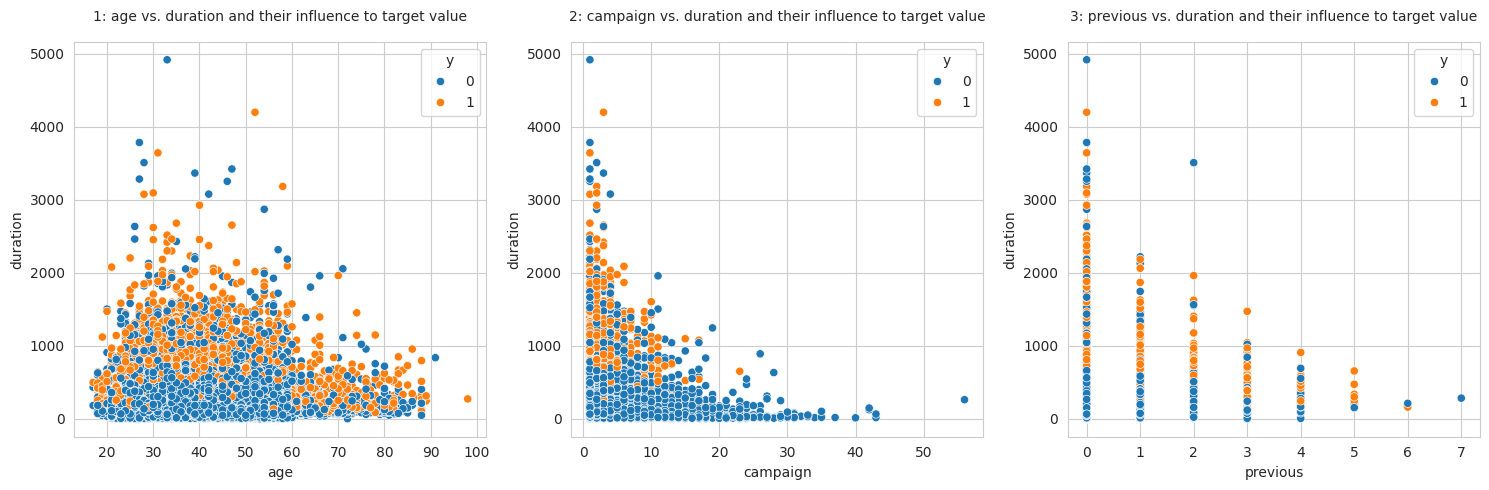

In [25]:
num_rows = 1
num_cols = 3

plt.figure(figsize=(15, 5))

numeric_features_l = numeric_features.to_list()
# remove duration
numeric_features_l.remove("duration")

for i, feature in enumerate(numeric_features_l, 1):
    if feature != "y":
        plt.subplot(num_rows, num_cols, i)
        sns.scatterplot(data=df, x=feature, y="duration", hue="y")
        plt.title(f"{i}: {feature} vs. duration and their influence to target value", fontsize=10, pad=15)

plt.tight_layout()

##### ...increasing contact duration increases the likelihood that the client subscribes a term deposit.
* At the same time, the numeric features such as age  and previous does not show a strong correlation with the subscription outcome by itself.
* The age distribution on the first plot is, as we have already seen, quite spread out, with the majority of customers between the ages of 20 and 60. Both the blue and orange dots are fairly evenly distributed across the different age groups, especially between these ages. The age of the client does not show a strong correlation with the subscription outcome by itself.
* On the second plot, however, there is a noticeable trend where most contact durations are concentrated at lower campaign contact numbers. As the number of contacts increases, the contact duration tends to decrease. The number of orange dots (i.e., the customer has subscribed) is higher for _lower_ contact numbers with _longer_ durations. This indicates a negative correlation between the _number of contacts_ performed during the campaign and the _duration_ of the contact.
* The number of previous contacts doesn't seem to have a significant impact on subscription. While the number of contacts during the previous campaign increases, the frequency of long duration contacts seems to decrease, but remains variable. It can be seen as a weak indicator of a negative correlation between two features (i.e., the higher the number of previous contacts, the shorter the duration), but this trend is not very strong.

#### Cross-tabulation analisys for categorical features

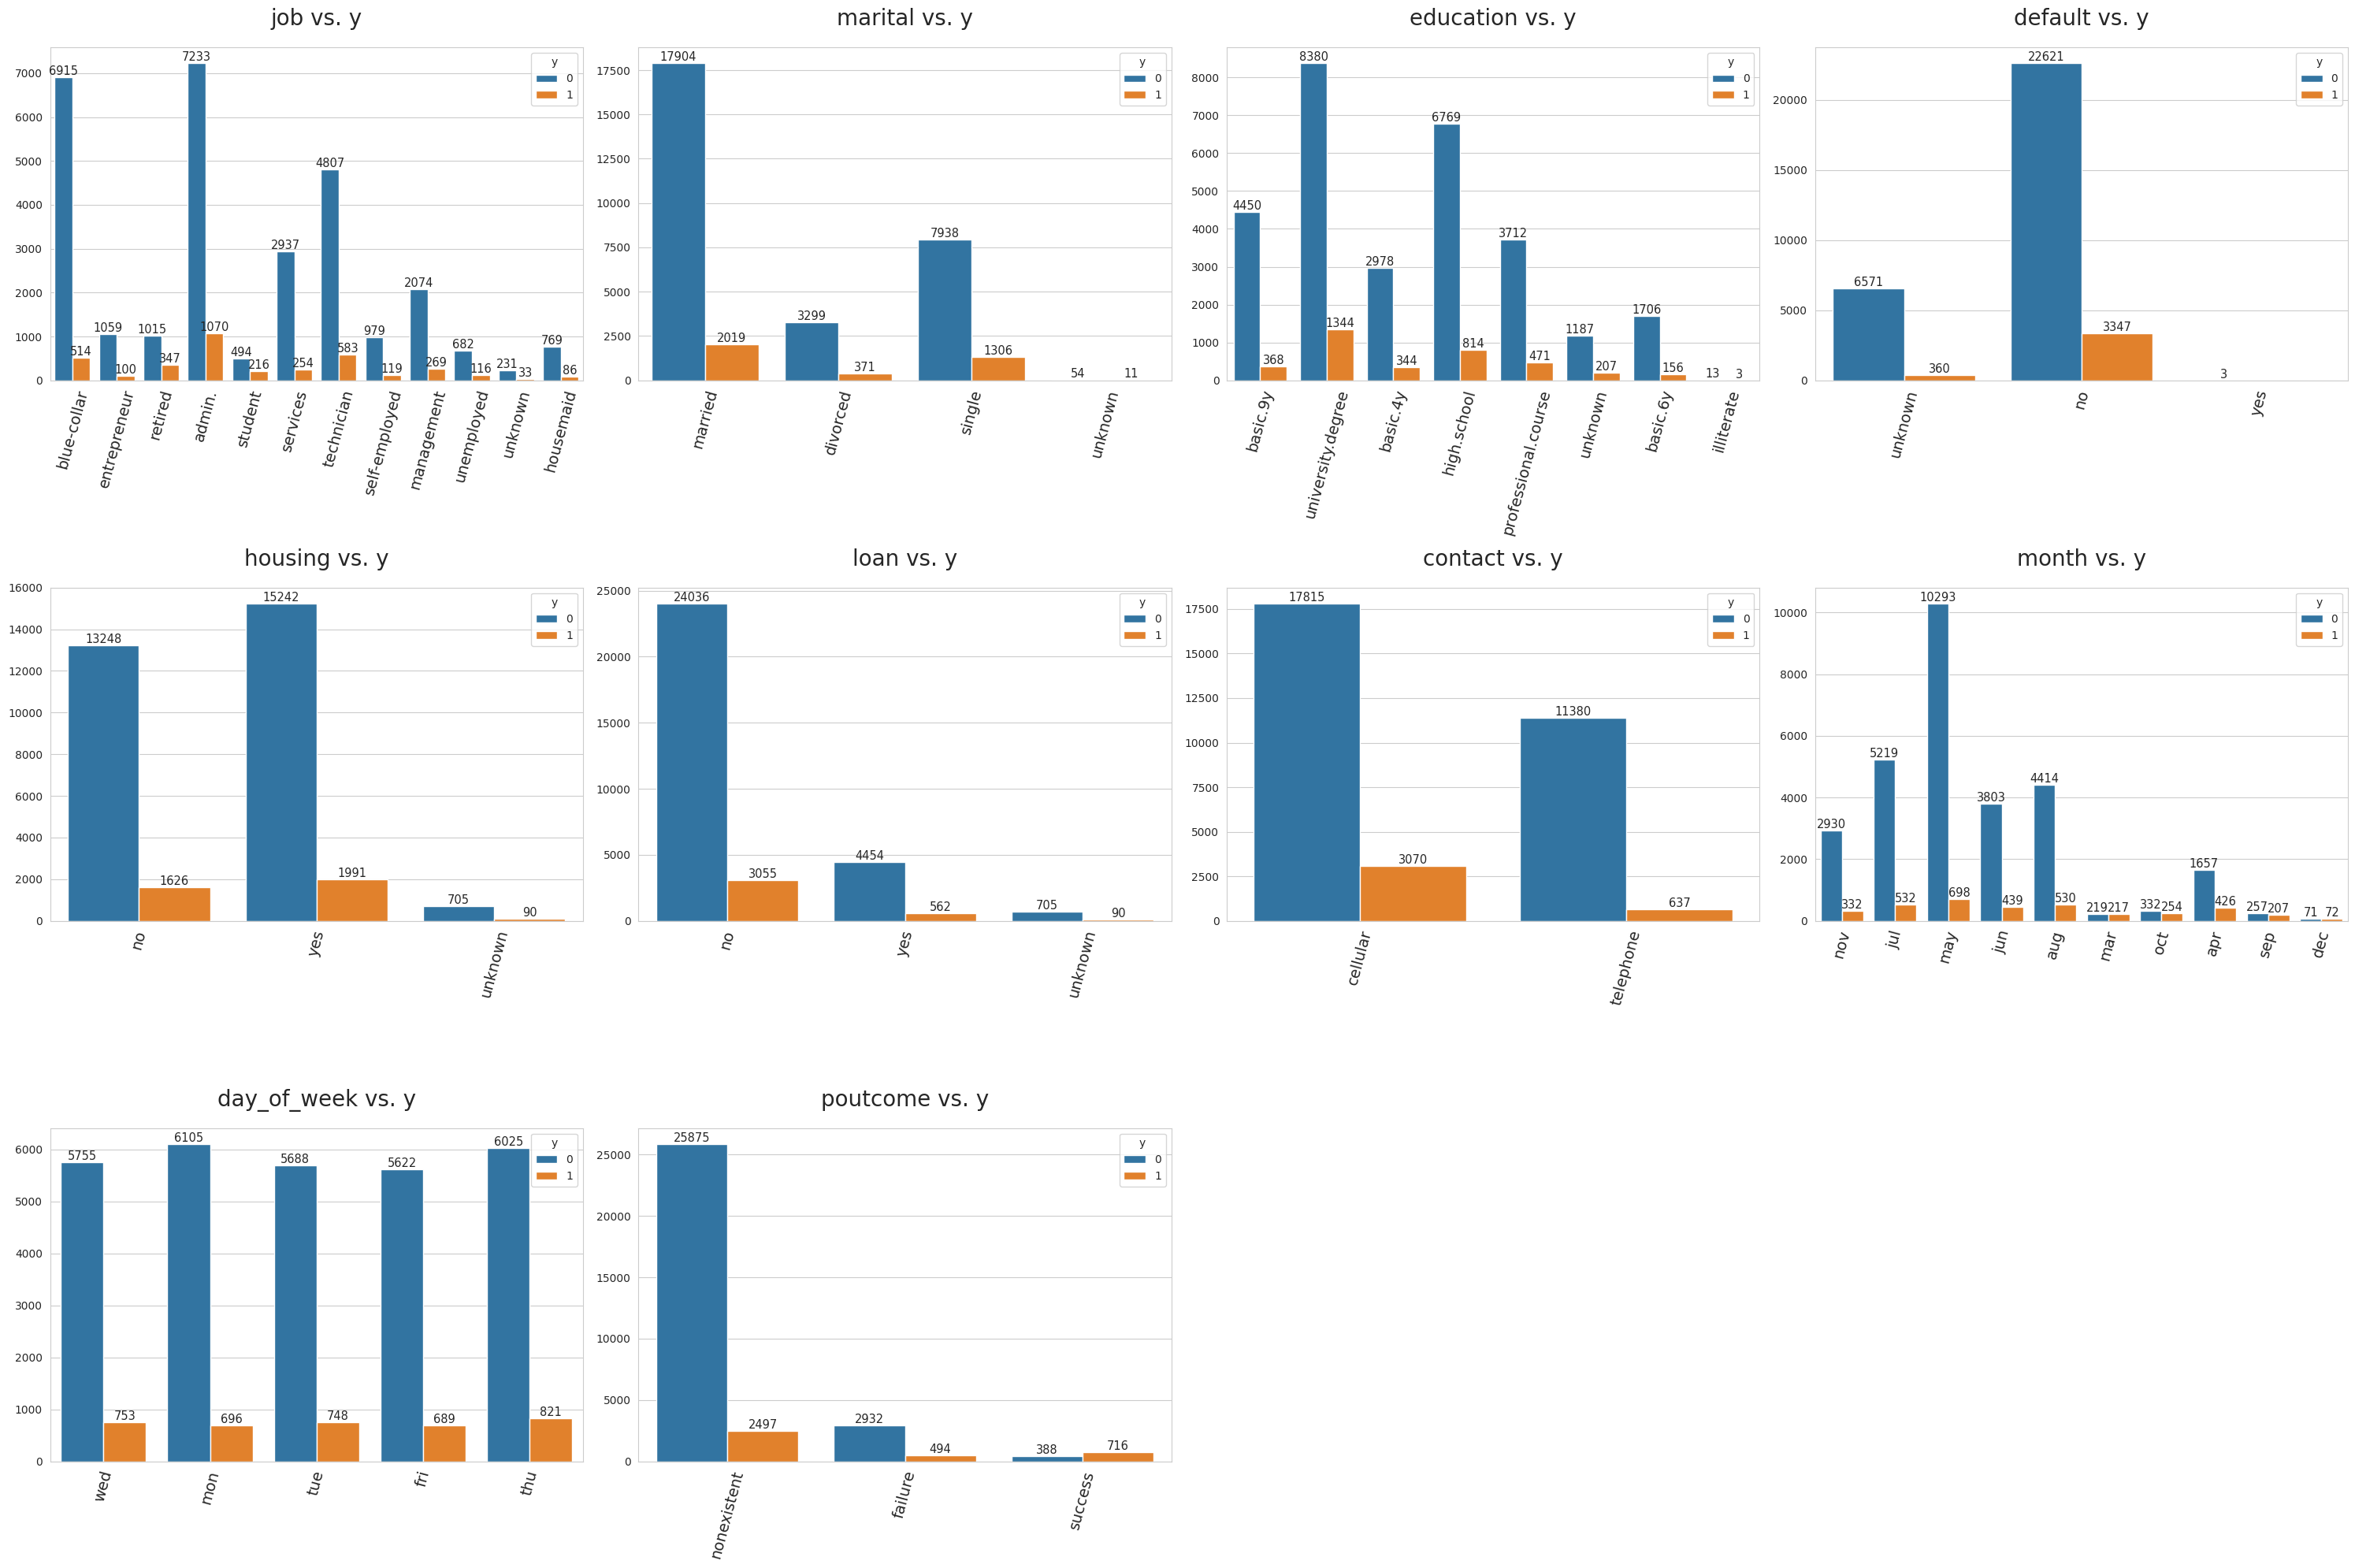

In [35]:
num_rows = 3
num_cols = 4

plt.figure(figsize=(30, 20))

for i, feature in enumerate(categorical_features, 1):
    if feature != "y":
        plt.subplot(num_rows, num_cols, i)
        ax = sns.countplot(data=df, x=feature, hue='y')
        for container in ax.containers:
            ax.bar_label(container, fontsize=10.5)
        plt.title(f'{feature} vs. y', fontsize=20, pad=20)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.xticks(rotation=75, fontsize=14)
        plt.yticks(fontsize=10)

plt.tight_layout()

* **job**: The job category influences the likelihood of a client subscribing to a term deposit. Retired individuals, students, and unemployed individuals show higher subscription rates, suggesting they are more likely to invest in term deposits.
* **marital**: Marital status has a noticeable influence on the likelihood of a client subscribing to a term deposit. Singles show a higher subscription rate, while married and divorced clients show lower and similar subscription rates. On the other hand, clients with basic (lower) education levels show lower subscription rates.
* **education**: Customers with a university degree or higher levels of education show higher subscription rates.
* **default**: Whether or not the customer has credit in default has a significant impact on the customer's decision to subscribe or not to subscribe to a term deposit. Customers without a credit in default have the highest subscription rate.
* **housing**: Having a housing loan does not appear to have a significant impact on the likelihood of subscribing to a term deposit. The subscription rates are relatively close for both clients with and without housing loans.
* **loan**: Similarly, having a personal loan does not seem to have a significant impact on the likelihood of subscribing to a term deposit. The subscription rates for customers with and without a personal loan are relatively close.
* **contact**: The method of contact has a significant impact on the likelihood of a customer subscribing to a fixed-term deposit. Contacts made by mobile phone (cellular) have a much higher subscription rate (14.70%) than those made by telephone (5.30%). 
* **month**: The month of contact has a significant impact on subscription rates. Certain months such as December, March, September, and October show significantly higher subscription rates. In contrast, months such as May and July show lower subscription rates despite high contact numbers.
* **day of week**: The contact day of the week has a relatively small impact on the likelihood of a customer subscribing to a term deposit, as the subscription rate is quite similar, ranging from 10.23% to 11.99%.
* **poutcome**: The outcome of the previous campaign ("poutcome") has a significant impact on the likelihood of a customer subscribing to a fixed-term deposit. Customers who subscribed to a term deposit in the previous campaign are much more likely to subscribe again (64.86%). Customers who haven't done so also have a reasonable subscription rate (14.42%). Customers with no previous campaign results have the lowest subscription rate (8.80%).